### Python training day 3

- Monte Carlo simulation and application; bootstrap confidence intervals.
- Statistical modelling: parametric and nonparametric density estimation.
- Linear regression with statsmodels
- Time-series analysis: parsing dates, resampling
- Reading & writing vector datasets(e.g ESRI Shapefiles) with Geopandas and GDAL
- Metres vs latitude and longitude: projections with Pyproj
- Spatial clusting with DBScan
- Creating beautiful maps with Cartopy and overlying statistical data

### Installing spatial libraries

Installing the spatial libraries can be a painful thansk to GDAL. To try and avoid the pain we'll use the Anaconda installer:

1. Open a command prompt in the folder your've got the  PX proxy installed in.
2. Run px.exe to start the proxy.
3. In your start menu type "Anaconda" and open the "Anaconda Prompt"
4. In the prompt to set up the use
   conda config --set proxy_servers.http localhost:3128 
   conda config --set proxy_servers.https localhost:3128 
5. In th prompt type
   conda install gdal fiona pyproj geopandas rtree
   
### Monte Carlo Simulation

Monte Carlo simulation is modelling a process,, repeatedly feeding the process with random input so  you can look at the distribution of the output.
   
 

In [1]:
import numpy as np

In [2]:
#np.random.seed(1)
np.random.random()

0.36385451405945357

In [4]:
np.random.random(100)

array([0.70180952, 0.51134387, 0.97125065, 0.26256627, 0.30797386,
       0.88135797, 0.37554576, 0.48568537, 0.08740021, 0.21100572,
       0.86155382, 0.94925716, 0.07782376, 0.8786734 , 0.05842131,
       0.52244512, 0.23107543, 0.16902174, 0.81681207, 0.00733385,
       0.17973475, 0.22324347, 0.65526041, 0.20671262, 0.9529217 ,
       0.96353747, 0.36258576, 0.35398085, 0.08451615, 0.97367647,
       0.35050225, 0.49809144, 0.90638023, 0.63040874, 0.43526202,
       0.03925926, 0.74625292, 0.16577607, 0.61978799, 0.06950171,
       0.48756066, 0.4313999 , 0.675398  , 0.36036414, 0.00593953,
       0.36443642, 0.34044918, 0.25788765, 0.90081826, 0.53942014,
       0.08243357, 0.91367929, 0.53255843, 0.14155467, 0.69399053,
       0.357259  , 0.35755029, 0.87763092, 0.49673885, 0.14695994,
       0.38058406, 0.59514816, 0.20474878, 0.73949397, 0.47343962,
       0.31025865, 0.431341  , 0.92632082, 0.88562972, 0.79951287,
       0.86859564, 0.04624613, 0.02459735, 0.01520843, 0.86379

In [9]:
np.random.random((10000,10000))

array([[0.5270581 , 0.8859421 , 0.35726976, ..., 0.76336024, 0.86404021,
        0.70792747],
       [0.94801722, 0.0469936 , 0.87398889, ..., 0.15330814, 0.84598688,
        0.27872785],
       [0.90185046, 0.37733316, 0.77290415, ..., 0.26913925, 0.43425152,
        0.25913873],
       ...,
       [0.34535495, 0.32799136, 0.97476837, ..., 0.15854353, 0.09546152,
        0.15600181],
       [0.93806532, 0.78887973, 0.90718296, ..., 0.74254302, 0.80722865,
        0.16320015],
       [0.30936233, 0.68123105, 0.06640435, ..., 0.35351118, 0.29481217,
        0.52091796]])

we're going to try and estimate the area of a circle using monte carlo simulation.
The area of a circle is pi r^2

In [20]:
x = np.random.random()
y = np.random.random()

np.sqrt(x **2 + y **2) < 1

False

In [21]:
def hyptenous(x,y):
    return np.sqrt(x **2 + y **2)

In [36]:
#%%timeit
num_trials = 100000
succcesses=0

for trial in range(num_trials):
    x = np.random.random()
    y = np.random.random()
    if np.sqrt(x **2 + y **2) < 1:
        succcesses += 1
        
succcesses / num_trials * 4 #guess for pi

3.1408

In [30]:
x = np.random.random(1000)
y = np.random.random(1000)

In [32]:
np.sqrt(x **2 + y **2) < 1 #broadcasting

array([ True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False,  True,
        True, False,  True, False,  True,  True,  True, False,  True,
        True,  True,  True,  True, False,  True, False, False,  True,
        True, False,  True,  True, False,  True,  True,  True, False,
        True, False, False,  True, False,  True,  True,  True,  True,
        True, False,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True, False,
       False,  True,  True,  True,  True,  True,  True, False,  True,
        True, False, False, False,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True, False, False,
        True, False,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [41]:
inCircle = np.sqrt(x **2 + y **2) < 1

In [42]:
np.sum(inCircle)/ 1000 * 4

0.004

In [43]:
np.mean(inCircle) * 4

4.0

## Exercise: what's your best estimate for $\pi$


use numpy to generate a larger set of trials say 1000000. What is your estimate of pi? you can see how good it is by comparing to the buitl in constant:

In [44]:
np.pi


3.141592653589793

Tme using %%timeit how long does a milioon tirals using numpy vs how long it toook to run loop.

In [57]:
%%timeit
numTrials = 1000000
x = np.random.random(numTrials)
y = np.random.random(numTrials)

inCircle = np.sqrt(x**2 + y**2) < 1

56 ms ± 4.64 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [58]:
np.mean(inCircle) * 4

4.0

In [51]:
%%timeit
num_trials = 1000000
succcesses=0
for trial in range(num_trials):
    x = np.random.random()
    y = np.random.random()
    if np.sqrt(x **2 + y **2) < 1:
        succcesses += 1
        
succcesses / num_trials * 4 #guess for pi

3.05 s ± 508 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [59]:
import sys

In [61]:
sys.getsizeof(x) / 1024 /1024

2.288818359375e-05

In [63]:
locals()

{'__name__': '__main__',
 '__doc__': 'Automatically created module for IPython interactive environment',
 '__package__': None,
 '__loader__': None,
 '__spec__': None,
 '__builtin__': <module 'builtins' (built-in)>,
 '__builtins__': <module 'builtins' (built-in)>,
 '_ih': ['',
  'import numpy as np',
  'np.random.random()',
  'np.random.random()',
  'np.random.seed(1)\nnp.random.random()',
  'np.random.seed(1)\nnp.random.random()',
  'np.random.seed(1)\nnp.random.random()',
  'np.random.random(100)',
  'np.random.random(10000,10000)',
  'np.random.random((10000,10000))',
  'x = np.random.random()\ny = np.random.random()\n\nnp.sqrt(x **2 + y **2) < 1',
  'x = np.random.random()\ny = np.random.random()\n\nnp.sqrt(x **2 + y **2) < 1',
  'x = np.random.random()\ny = np.random.random()\n\nnp.sqrt(x **2 + y **2) < 1',
  'def hyptenous(x,y):\n    return np.sqrt(x **2 + y **2)',
  'for trial in range(1000):\n    x = np.random.random()\n    y = np.random.random()\n    if np.sqrt(x **2 + y **2):\

### Not all algorithms are simple math

If you have a function you want to use for monte-carl simulation and it isn't just math you can re-write to be effincient in numpy, you can still use numpy as an input without having to write a for loop.

In [64]:
def isItCold(temperature):
    """A complex way to say is it cold or not"""
    if temperature < 20:
        return True
    return False

In [65]:
vIsItCold = np.vectorize(isItCold)

In [66]:
temperatures = np.random.normal(23,4,10)

In [67]:
temperatures

array([25.78435684, 21.47458276, 20.50545988, 21.56034772, 21.48880305,
       23.42111828, 24.88958262, 21.89146385, 24.79973294, 20.48511187])

In [68]:
isItCold(temperatures)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [69]:
vIsItCold(temperatures)

array([False, False, False, False, False, False, False, False, False,
       False])

In [70]:
@np.vectorize
def isItCold(temperature):
    """A complex way to say is it cold or not"""
    if temperature < 20:
        return True
    return False

### Morning tea - back in 15

### Statistics with SciPY

In [72]:
import pandas as pd

In [73]:
crashes = pd.read_csv('D:/Data/traffic/Queensland_crashes.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [74]:
crashes.dtypes

Crash_Ref_Number                     int64
Crash_Severity                      object
Crash_Year                           int64
Crash_Month                         object
Crash_Day_Of_Week                   object
Crash_Hour                           int64
Crash_Nature                        object
Crash_Type                          object
Crash_Longitude_GDA94              float64
Crash_Latitude_GDA94               float64
Crash_Street                        object
Crash_Street_Intersecting           object
State_Road_Name                     object
Loc_Suburb                          object
Loc_Local_Government_Area           object
Loc_Post_Code                       object
Loc_Police_Division                 object
Loc_Police_District                 object
Loc_Police_Region                   object
Loc_Queensland_Transport_Region     object
Loc_Main_Roads_Region               object
Loc_ABS_Statistical_Area_2          object
Loc_ABS_Statistical_Area_3          object
Loc_ABS_Sta

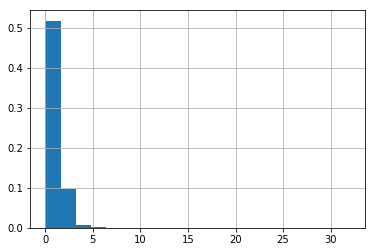

In [79]:
%matplotlib inline
crashes['Count_Casualty_Total'].hist(bins=20, density=True)

In [80]:
casuatly = crashes['Count_Casualty_Total'].values

In [81]:
import scipy.stats

In [84]:
params = scipy.stats.uniform.fit(casuatly)  #generates parameters to fit model

In [87]:
models = scipy.stats.uniform(params[0],params[1])

In [89]:
models.rvs(10)

array([26.33355442, 14.5811711 , 18.06746575, 19.17799855, 28.54219946,
       11.24739953,  8.24964229, 19.78723245, 25.3644303 ,  3.6404636 ])

In [91]:
models.pdf(1)   #probabilty denstiy function

0.03125

In [92]:
models.cdf(15)    #cummalitve density function

0.46875

In [93]:
models.ppf(0.5)   #percent point function

16.0

In [95]:
potentialCas = np.linspace(0,32,1000)

In [97]:
import matplotlib.pyplot as plt

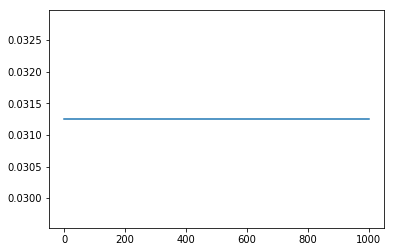

In [99]:
plt.plot(models.pdf(potentialCas))

In [100]:
params = scipy.stats.norm.fit(casuatly) 

In [101]:
params

(0.9799419339704551, 0.8774647540482406)

In [103]:
model = scipy.stats.norm(params[0],params[1])

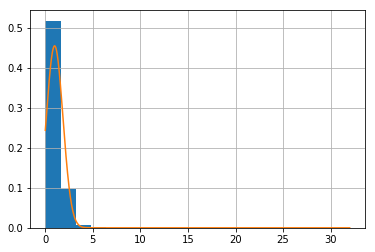

In [107]:
crashes['Count_Casualty_Total'].hist(bins=20, density=True)
plt.plot(potentialCas, # x values
        model.pdf(potentialCas)) # y valus

In [108]:
params = scipy.stats.gamma.fit(casuatly)

In [110]:
model = scipy.stats.gamma(*params)  # fit data parameters number not needed

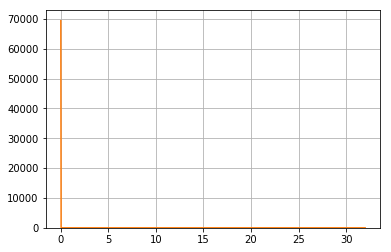

In [111]:
crashes['Count_Casualty_Total'].hist(bins=20, density=True)
plt.plot(potentialCas, # x values
        model.pdf(potentialCas)) # y valus

### Fitting and choosing a modle for your data

Try fitting and plotting for the following models.

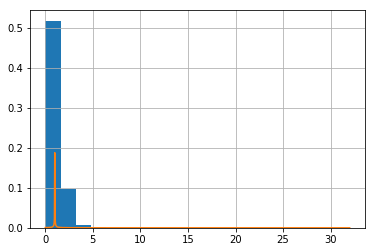

In [112]:
params = scipy.stats.t.fit(casuatly)
model = scipy.stats.t(*params)
crashes['Count_Casualty_Total'].hist(bins=20, density=True)
plt.plot(potentialCas, # x values
        model.pdf(potentialCas)) # y valus

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2316: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


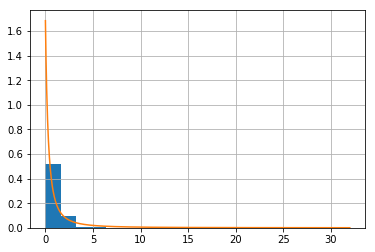

In [113]:
params = scipy.stats.pareto.fit(casuatly)
model = scipy.stats.pareto(*params)
crashes['Count_Casualty_Total'].hist(bins=20, density=True)
plt.plot(potentialCas, # x values
        model.pdf(potentialCas)) # y valus

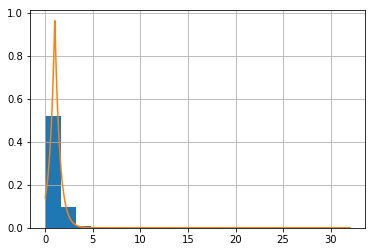

In [114]:
params = scipy.stats.laplace.fit(casuatly)
model = scipy.stats.laplace(*params)
crashes['Count_Casualty_Total'].hist(bins=20, density=True)
plt.plot(potentialCas, # x values
        model.pdf(potentialCas)) # y valus

In [116]:
models = {
    'students t': scipy.stats.t,
    'pareto': scipy.stats.pareto,
    'laplace': scipy.stats.laplace
}

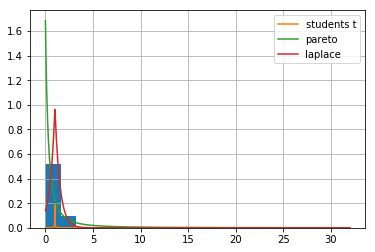

In [118]:
crashes['Count_Casualty_Total'].hist(bins=20, density=True)

for key in models:
    params = models[key].fit(casuatly)
    model =  models[key](*params)
    plt.plot(
        potentialCas, # x values
        model.pdf(potentialCas),
    label =key
    ) # y valus
plt.legend()

In [119]:
params = scipy.stats.pareto.fit(casuatly)

In [120]:
model = scipy.stats.pareto(*params)

In [121]:
model.cdf

<bound method rv_frozen.cdf of <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000000048C6C080>>

In [124]:
scipy.stats.kstest(casuatly, model.cdf)

KstestResult(statistic=0.35646857032914575, pvalue=0.0)

### Non-parametric statistics

In [127]:
kd_model = scipy.stats.gaussian_kde(casuatly)

In [129]:
plt.plot(
    potential_casualties,
    casuatly(potential_casualties))

NameError: name 'potential_casualties' is not defined

In [130]:
kdeModel.integrate_box_1d(1,5) #probility of between 1 and 5 casualites

NameError: name 'kdeModel' is not defined

### Linear regression in Python

We can do linear regression in scipy, but its ugly. But its much nicer to use the "statsmodel" library.  **A quick note**
Python is by design happy to be second best at lots of thing and to be easy to write. R is the language for stats but its not a general purpose language. Happily if you want you can call R code from Python using the "RPy2" library. You can go the other way from R to Python with "reticulate".


In [142]:
calories = pd.read_csv('D:/Data/calories.csv')
calories.set_index ="food"

In [145]:
calories.head()

,Food,Measure,Weight (g),kCal,Fat (g),Carbo(g),Protein (g)
0,"1000 Island,Salad Drsng,Local",1 Tbsp,15.00,25,2,2,0
1,"1000 Island,Salad Drsng,Reglr",1 Tbsp,16.00,60,6,2,0
2,"40% Bran Flakes,Kellogg's",1 oz,28.35,90,1,22,4
3,"40% Bran Flakes,Post",1 oz,28.35,90,0,22,3
4,"Alfalfa Seeds,Sprouted,Raw",1 Cup,33.00,10,0,1,1


In [147]:
calories.columns = [
    'food','measure','weight','kcal','fat','carbo', 'protein'
]

In [150]:
import statsmodels.api as sm
from statsmodels.api import formula as smf

In [151]:
formula = 'kcal ~ carbo + protein' 

In [152]:
model = smf.ols(formula, calories).fit()

In [154]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   kcal   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     1859.
Date:                Wed, 02 Oct 2019   Prob (F-statistic):               0.00
Time:                        11:57:12   Log-Likelihood:                -6645.9
No. Observations:                 960   AIC:                         1.330e+04
Df Residuals:                     957   BIC:                         1.331e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     20.2256      9.765      2.071      0.039       1.062      39.389
carbo          5.4356      0.122     44.401      0.000       5.195       5.676
protein        9.0395      0.949      9.521      0.000       7.176      10.903
==============================================================================
Omnibus:                     1021.350   Durbin-Watson:                   1.811
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            52593.022
Skew:                           5.194   Prob(JB):                         0.00
Kurtosis:                      37.741   Cond. No.                         106.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [156]:
sample = calories.sample(3) 

In [157]:
sample

,food,measure,weight,kcal,fat,carbo,protein
292,Custard Pie,1 Pie,910.00,1985,101,213,56
3,"40% Bran Flakes,Post",1 oz,28.35,90,0,22,3
519,"Mixed Nuts W/ Peants,Oil,Saltd",1 oz,28.35,175,16,6,5


In [158]:
model.predict(sample)

292    1684.217571
3       166.927017
519      98.036665
dtype: float64

### Exercise: Getting a better fit

Update your formula to include the weight, fat,carbo and protein columns.
Create a new model form the formula an dlook at the summary. What is the rsquared value

Use the model to preidict the entire calories dataset to get estimated calories. Use a scatter plot to plot acutal vs estimated to see how well you did:

In [159]:
import seaborn

In [160]:
formula2 = 'kcal ~ carbo + protein +fat + weight' 

In [162]:
model = smf.ols(formula2, calories).fit()

In [163]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   kcal   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.913e+05
Date:                Wed, 02 Oct 2019   Prob (F-statistic):               0.00
Time:                        12:05:48   Log-Likelihood:                -4197.2
No. Observations:                 960   AIC:                             8404.
Df Residuals:                     955   BIC:                             8429.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.9897      0.909     -2.190      0.029      -3.773      -0.207
carbo          3.8120      0.015    259.536      0.000       3.783       3.841
protein        4.2337      0.076     55.753      0.000       4.085       4.383
fat            8.7775      0.023    385.772      0.000       8.733       8.822
weight         0.0165      0.007      2.505      0.012       0.004       0.029
==============================================================================
Omnibus:                      761.712   Durbin-Watson:                   1.605
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           103573.955
Skew:                          -2.821   Prob(JB):                         0.00
Kurtosis:                      53.572   Cond. No.                         357.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [165]:
crashes['Crash_Day_Of_Week'].unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [166]:
crashes.columns

Index(['Crash_Ref_Number', 'Crash_Severity', 'Crash_Year', 'Crash_Month',
       'Crash_Day_Of_Week', 'Crash_Hour', 'Crash_Nature', 'Crash_Type',
       'Crash_Longitude_GDA94', 'Crash_Latitude_GDA94', 'Crash_Street',
       'Crash_Street_Intersecting', 'State_Road_Name', 'Loc_Suburb',
       'Loc_Local_Government_Area', 'Loc_Post_Code', 'Loc_Police_Division',
       'Loc_Police_District', 'Loc_Police_Region',
       'Loc_Queensland_Transport_Region', 'Loc_Main_Roads_Region',
       'Loc_ABS_Statistical_Area_2', 'Loc_ABS_Statistical_Area_3',
       'Loc_ABS_Statistical_Area_4', 'Loc_ABS_Remoteness',
       'Loc_State_Electorate', 'Loc_Federal_Electorate',
       'Crash_Controlling_Authority', 'Crash_Roadway_Feature',
       'Crash_Traffic_Control', 'Crash_Speed_Limit',
       'Crash_Road_Surface_Condition', 'Crash_Atmospheric_Condition',
       'Crash_Lighting_Condition', 'Crash_Road_Horiz_Align',
       'Crash_Road_Vert_Align', 'Crash_DCA_Code', 'Crash_DCA_Description',
       'Crash_

In [172]:
formula = 'Count_Casualty_Total ~ C(Crash_Day_Of_Week)+ Crash_Hour -1'

In [173]:
model= smf.ols(formula,crashes).fit()

In [174]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     Count_Casualty_Total   R-squared:                       0.001
Model:                              OLS   Adj. R-squared:                  0.001
Method:                   Least Squares   F-statistic:                     33.02
Date:                  Wed, 02 Oct 2019   Prob (F-statistic):           2.92e-46
Time:                          12:19:47   Log-Likelihood:            -4.2274e+05
No. Observations:                328247   AIC:                         8.455e+05
Df Residuals:                    328239   BIC:                         8.456e+05
Df Model:                             7                                         
Covariance Type:              nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
C(Crash_Day_Of_Week)[Friday]        0.9262      0.005    172.005      0.000       0.916       0.937
C(Crash_Day_Of_Week)[Monday]        0.9392      0.006    169.465      0.000       0.928       0.950
C(Crash_Day_Of_Week)[Saturday]      0.9683      0.005    178.083      0.000       0.958       0.979
C(Crash_Day_Of_Week)[Sunday]        0.9890      0.006    173.239      0.000       0.978       1.000
C(Crash_Day_Of_Week)[Thursday]      0.9330      0.005    171.281      0.000       0.922       0.944
C(Crash_Day_Of_Week)[Tuesday]       0.9403      0.006    170.842      0.000       0.930       0.951
C(Crash_Day_Of_Week)[Wednesday]     0.9414      0.005    171.720      0.000       0.931       0.952
Crash_Hour                          0.0026      0.000      9.057      0.000       0.002       0.003
==============================================================================
Omnibus:                   213234.685   Durbin-Watson:                   1.846
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         10136930.823
Skew:                           2.519   Prob(JB):                         0.00
Kurtosis:                      29.754   Cond. No.                         95.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Time series data in Pandas
Any dataset with a data/time can be turned into a time series. However when you load most datasets they don't have a native dateime format.

In [194]:
rain=pd.read_csv(
    'D:/Data/Rainfall/10010.csv',
    header= None,
    names=['date','rain'],
    parse_dates=['date'],
    dayfirst=True,
    index_col='date')

In [195]:
rain.dtypes

rain    float64
dtype: object

In [196]:
rain

,rain
date,
1930-09-01,0.000000
1930-09-02,0.000000
1930-09-03,0.000000
1930-09-04,0.000000
1930-09-05,3.063430
1930-09-06,1.967835
1930-09-07,1.090469
1930-09-08,0.610020
1930-09-09,0.346879


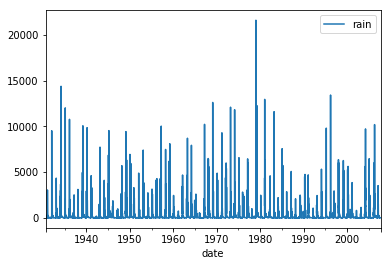

In [199]:
rain.plot()

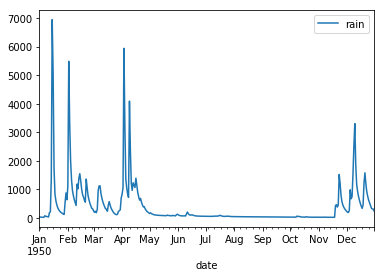

In [201]:
rain.loc['1950'].plot()

In [202]:
rain.loc['1950-02']

,rain
date,
1950-02-01,1103.525610
1950-02-02,5482.339441
1950-02-03,3295.558391
1950-02-04,2012.802178
1950-02-05,1346.940205
1950-02-06,963.454119
1950-02-07,781.057200
1950-02-08,636.337186
1950-02-09,534.871851


In [203]:
rain.loc['1950-02-14']

rain    1547.636085
Name: 1950-02-14 00:00:00, dtype: float64

In [204]:
rain.loc['1950-02-14 00:00:00.000000']

rain    1547.636085
Name: 1950-02-14 00:00:00, dtype: float64

In [205]:
rain.loc['1950-02-14 00:00:00.000001']

KeyError: '1950-02-14 00:00:00.000001'

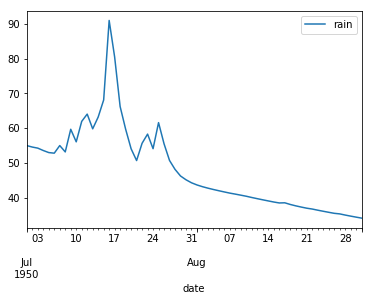

In [206]:
rain.loc['1950-07': '1950-08'].plot()

In [207]:
rain.loc['1950-07': '1950-08'].mean()

rain    48.190732
dtype: float64

### Exercise: How wet was Bonny Doon when you were born?

The avearage rainfall at Bonny Doon for the entire dataset is:

In [208]:
rain.mean()

rain    201.139751
dtype: float64

In [209]:
rain.loc['1983-03-03']

rain    27.969615
Name: 1983-03-03 00:00:00, dtype: float64

In [210]:
rain.loc['1983'].mean()

rain    166.830307
dtype: float64

In [211]:
rain.loc['1983-03'].mean()

rain    1327.509799
dtype: float64

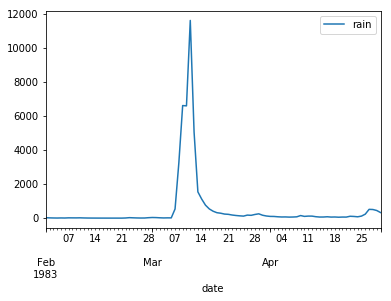

In [212]:
rain.loc['1983-02': '1983-04'].plot()

In [213]:

.resample('Y').size().plot()

NameError: name 'creashes' is not defined

### Spatial data in Python 

First, since we our notebooks open before we did the install this morning we're going to have to restart the ntoebook server entirly.